<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/19_10_14bike%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike 
 - 평가 메트릭
 - 모델 만들기
 - 원핫인코딩
 - 교차 검증 : cross_val
 - log변환
 - XGboosting 모델 이해
 - 하이퍼 파라미터 튜닝

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns ## seaborn은 matplotlib보다 간단하게 사용 가능


# 데이터 탐색하기
 - 데이터의 행과 열( shape )
 - 컬럼명 확인
 -각 컬럼의 자료형
 -컬럼 결측치의 확인

In [70]:
"""
필드명 설명
datetime hourly date + timestamp
season 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday whether the day is considered a holiday
workingday whether the day is neither a weekend nor holiday
weather
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp temperature in Celsius (온도)
필드명 설명
atemp "feels like" temperature in Celsius (체감온도)
humidity relative humidity (습도)
windspeed wind speed (바람속도)
casual number of non-registered user rentals initiated (비가입자 사용유저)
registered number of registered user rentals initiated (가입자 사용유저)
count number of total rentals (전체 렌탈 대수)
"""

'\n필드명 설명\ndatetime hourly date + timestamp\nseason 1 = spring, 2 = summer, 3 = fall, 4 = winter\nholiday whether the day is considered a holiday\nworkingday whether the day is neither a weekend nor holiday\nweather\n1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\ntemp temperature in Celsius (온도)\n필드명 설명\natemp "feels like" temperature in Celsius (체감온도)\nhumidity relative humidity (습도)\nwindspeed wind speed (바람속도)\ncasual number of non-registered user rentals initiated (비가입자 사용유저)\nregistered number of registered user rentals initiated (가입자 사용유저)\ncount number of total rentals (전체 렌탈 대수)\n'

In [0]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
test = pd.read_csv("test.csv",parse_dates =['datetime'])

In [3]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None


In [5]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB
None


**결측치 없음 확인**

In [6]:
print(train.columns)
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


##  데이터 시각화를 통한 데이터 이해

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


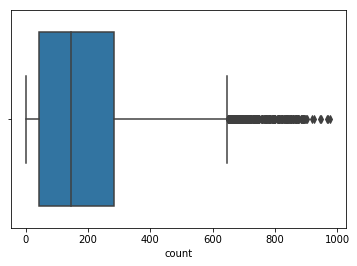

In [7]:
print(train['count'].describe())
sns.boxplot(train['count'])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

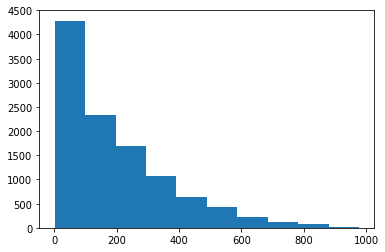

In [8]:
plt.hist(train['count'])

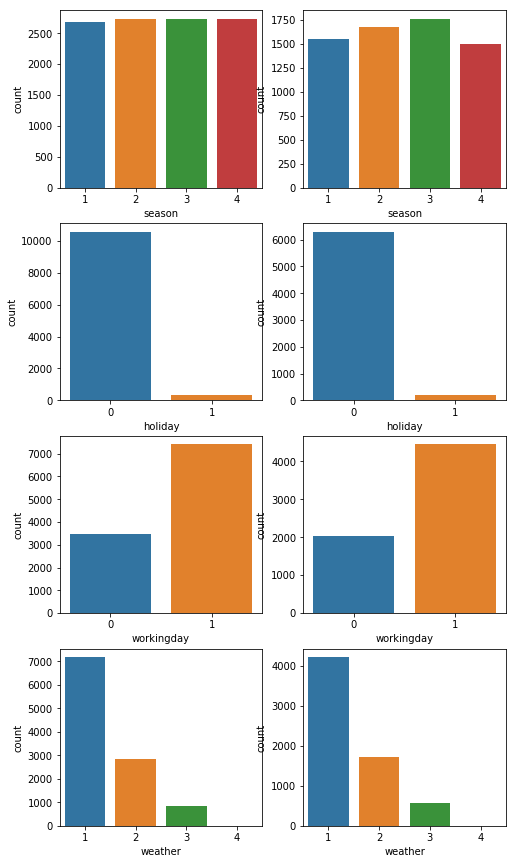

In [9]:
col_names = [ 'season', 'holiday', 'workingday', 'weather' ]
i = 0
plt.figure(figsize=(8,15)) # 전체 그래프의 크기 지정 (가로, 세로)
for name in col_names: # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
 i = i + 1 # 숫자를 1씩 증가.
 plt.subplot(4,2,i*2-1) # 2행 2열에 i번째 그래프 선택
 sns.countplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.
 plt.subplot(4,2,i*2) # 2행 2열에 i번째 그래프 선택
 sns.countplot(name, data=test) # i번째 그래프에 sns.countplot를 그리겠다.
# 주피터에서 아래 행이 필요없지만,
# 다른곳(editor, pycharm)에서는(*.py 파일) plt.show()이걸 실행시켜야 한다.
plt.show()

In [13]:
### temp, atemp, humidity, windspeed
num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

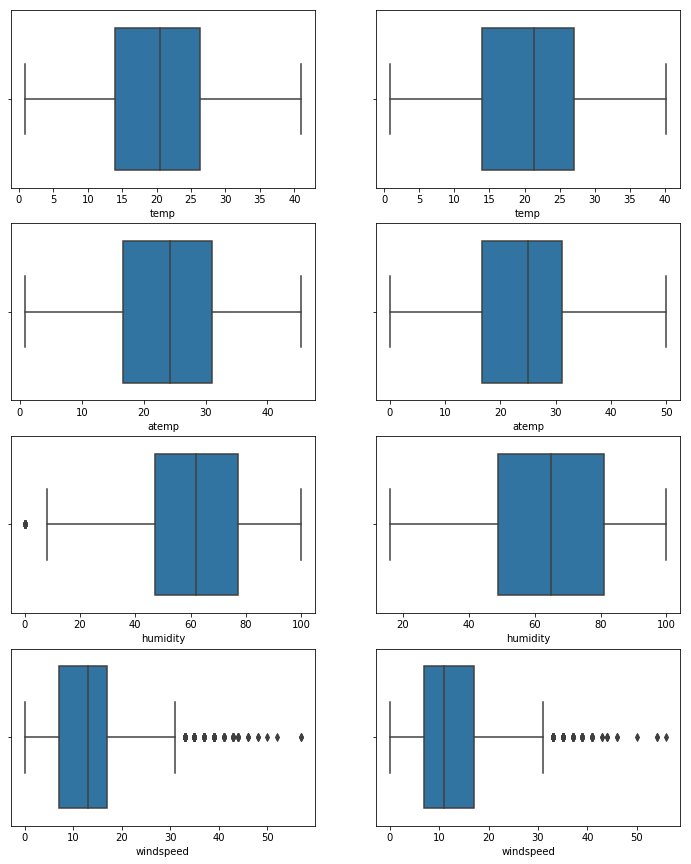

In [14]:
# par(mfrow=c(2,2)) -> R
i = 0
plt.figure(figsize=(12,15)) # 전체 그래프의 크기 지정 (가로, 세로)
for name in num_names: # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
 i = i + 1 # 숫자를 1씩 증가.
 plt.subplot(4,2,i*2-1) # 2행 2열에 i번째 그래프 선택
 sns.boxplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.
 plt.subplot(4,2,i*2) # 2행 2열에 i번째 그래프 선택
 sns.boxplot(name, data=test) # i번째 그래프에 sns.countplot를 그리겠다.

plt.show() 

**전반적으로 값의 분포가 비슷하며, 간간히 이상치가 보인다.**

##  데이터 새로운 컬럼을 만들어보기

In [15]:
# 데이터 백업
new_tr = train
new_test = test
new_tr.columns 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [16]:
# 데이터셋 (백업)
new_tr = train
new_test = test
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [17]:
new_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [18]:
new_tr['datetime'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [19]:
new_test['datetime'].dt.day.head()

0    20
1    20
2    20
3    20
4    20
Name: datetime, dtype: int64

In [20]:
# 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [21]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr[ ['datetime', 'year', 'month', 'day', 'hour', 'dayofweek'] ]

,datetime,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5
5,2011-01-01 05:00:00,2011,1,1,5,5
6,2011-01-01 06:00:00,2011,1,1,6,5
7,2011-01-01 07:00:00,2011,1,1,7,5
8,2011-01-01 08:00:00,2011,1,1,8,5
9,2011-01-01 09:00:00,2011,1,1,9,5


## 생성된 컬럼에 대한 시각화

In [32]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

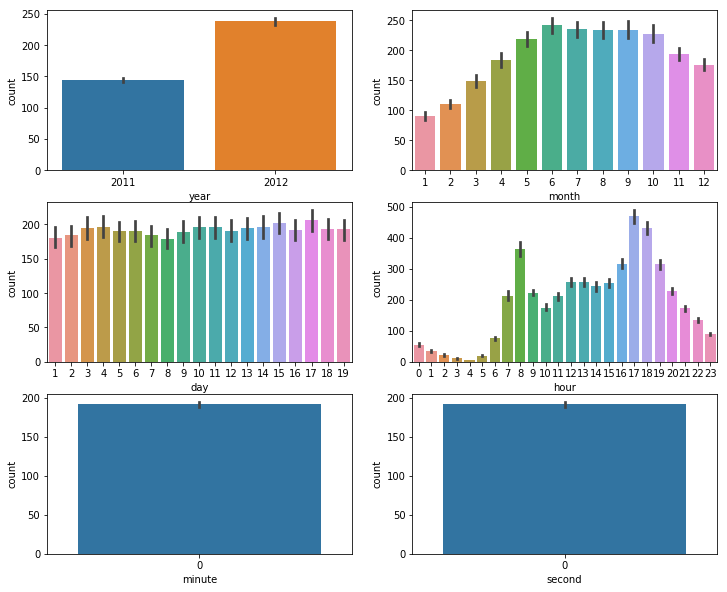

In [42]:
datetime_names =  ['year', 'month', 'day', 'hour', 'minute', 'second',]

i = 0
plt.figure(figsize=(12,10))

for name in datetime_names :
  i = i + 1
  plt.subplot(3,2,i)
  sns.barplot(x=name,y='count', data=new_tr)

plt.show()

In [0]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second


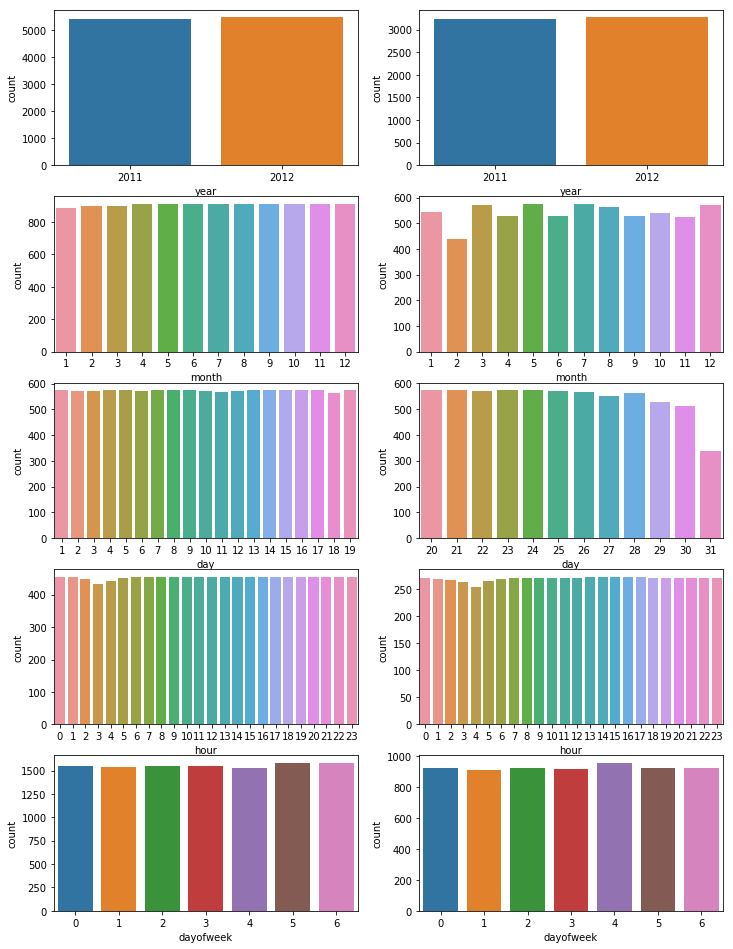

In [40]:
col_names = ['year','month','day','hour','dayofweek']
i = 0
plt.figure(figsize=(12,20)) ##전체 그래프 크기 지정
for name in col_names: ## 컬럼명으로 반복
 i = i+1
 plt.subplot(6,2,i) ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
 sns.countplot(name, data = new_tr)

 i = i+1
 plt.subplot(6,2,i) ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
 sns.countplot(name, data = new_test)

plt.show()

In [0]:
new_tr = new_tr.drop = ()

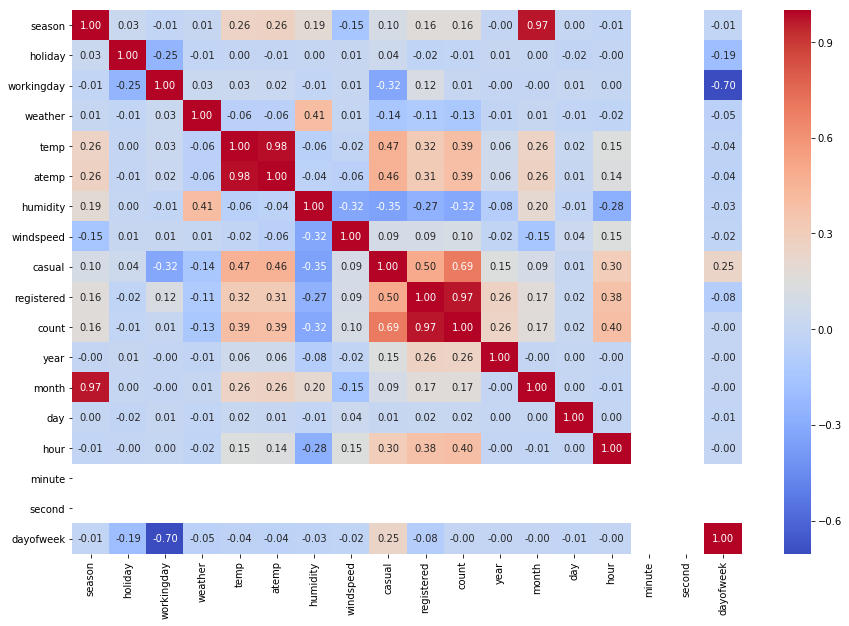

In [37]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f",cmap="coolwarm")

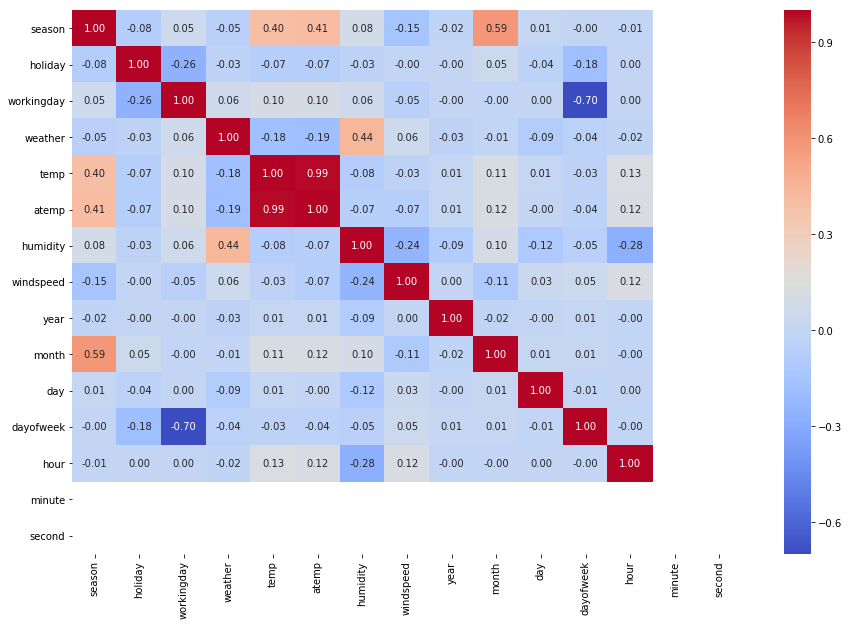

In [38]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_test.corr(), annot=True, fmt=".2f", cmap="coolwarm")

## 모델 만들고 제출해 보기

In [22]:
### temp, atemp, humidity, windspeed
num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [0]:
f_names = ['temp', 'atemp']
X_train = train[f_names]  # 학습용 데이터
X_test = test[f_names]    # 예측 데이터

In [0]:
# 출력 데이터(예측 데이터) 선택
label_name = 'count' #렌탈 대수 (통계: 종속변수)
y_train = train[label_name] #렌탈 대수 변수 값 선택

## 모델 만들기 및 예측 순서
- 모델을 생성한다. model = 모델명()
- 모델을 학습한다. model.fit( 입력값, 출력값 )
- 모델을 이용하여 예측 model.predict(입력값)

**scikit-learn 패키지를 사용한 선형 회귀분석**

In [0]:
# 모델 사용을 위한 준비(라이브러리 가져오기)
from sklearn.linear_model import LinearRegression

In [26]:
#  모델 생성, 학습, 예측
model = LinearRegression()
model.fit(X_train, y_train) # 예측 (새로운 데이터로)
model.predict(X_test)

array([101.95625474, 104.0156171 , 104.0156171 , ..., 103.33067499,
       104.0156171 , 104.0156171 ])

##학습된 모델의 내용 확인해 보기
- y(자전거렌탈대수) = a1 (temp) + a2 (atemp) + b
- y(자전거렌탈대수) = 8.19865874 (temp) + 0.90720808 (atemp) + 4.24813264

In [27]:
model.coef_
# 추정된 가중치 벡터 (w1, w2값)  y= w1 x1+ w2 x2 + b

array([8.19865874, 0.90720808])

In [28]:
model.intercept_
# 추정된 상수항 (b값) y= w1 x1+ w2 x2 + b

4.2481326458035085

## 학습된 모델로 예측 후, 제출

In [0]:
pred = model.predict(X_test) # 예측
sub = pd.read_csv("sampleSubmission.csv") # 답지 가져오기
sub['count'] = pred # 답쓰기


In [0]:
#index=False : csv 파일 행번호 없애기
sub.to_csv("firstsubmission.csv", index=False)

In [44]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 'temp',
 'atemp', 'humidity', 'windspeed', "year", "hour", "dayofweek"]  # 공통 변수 
X_train = new_tr[feature_names]  # 학습용 데이터 변수 선택
print(X_train.head())

   season  holiday  workingday  weather  ...  windspeed  year  hour  dayofweek
0       1        0           0        1  ...        0.0  2011     0          5
1       1        0           0        1  ...        0.0  2011     1          5
2       1        0           0        1  ...        0.0  2011     2          5
3       1        0           0        1  ...        0.0  2011     3          5
4       1        0           0        1  ...        0.0  2011     4          5

[5 rows x 11 columns]


In [45]:
label_name = 'count'                # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]        # 렌탈 대수 변수 값 선택
X_test = new_test[feature_names]    # 테스트 데이터의 변수 선택 
X_test.head()                       # 테스트 데이터 선택된 내용 보기 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


## 모델 만들기 및 제출
- 모델 만들기 및 예측 순서
- 모델을 생성한다. model = 모델명()
- 모델을 학습한다. model.fit( 입력값, 출력값 )
- 모델을 이용하여 예측 model.predict(입력값

**선형회귀**

In [0]:
from sklearn.linear_model import LinearRegression   # 선형회귀

In [47]:
seed = 37
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

array([-23.27179232, -20.84936197, -13.04580719, ..., 209.84495832,
       227.95174821, 217.86201958])

**랜덤포레스트**

In [0]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

In [50]:
seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [51]:
model.fit(X_train, y_train) # 모델 학습
predictions = model.predict(X_test)
predictions

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 10. ,   4. ,   3.8, ..., 112.7,  91.4,  45.9])

In [0]:
# sub = pd.read_csv("sampleSubmission.csv")
sub['count'] = predictions

In [53]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,10.0
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.8
3,2011-01-20 03:00:00,3.4
4,2011-01-20 04:00:00,2.6


In [0]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("firstsubmission1.csv", index=False)

##  모델 평가
 - 데이터 나누는 방법으로 기본으로 train_test_split 함수가 있음.
 - 교차검증 반복 함수 cross_val_score
 - cross_val_score(model, X, y, scoring=None, cv=None)
   - model : 회귀 분석 모형
   - X : 독립 변수 데이터
  - y : 종속 변수 데이터
   - scoring : 성능 검증에 사용할 함수 이름
   - cv : 교차검증 생성기 객체 또는 숫자.
    None이면 KFold(3), 숫자 k이면 KFold(k)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

**선형회귀모델**

In [59]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
score = cross_val_score(model_linear, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())

[-10001.73269892 -14719.1205855  -13684.42876335 -33057.3894553
 -33971.64722717]
MSE 평균 : -21086.863746046205


**의사결정트리**

In [60]:
### 의사결정트리 decision tree, knn
model_decisionTree = DecisionTreeRegressor()
model_decisionTree.fit(X_train, y_train)
score = cross_val_score(model_decisionTree, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())

[-7979.81772268 -5145.30041341 -8675.79007809 -9027.2223243
 -8510.88229215]
MSE 평균 : -7867.802566125615


**앙상블 모델(RandomForest)**

In [61]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[-7253.79862798 -3276.08542286 -6682.3690093  -4924.00976015
 -6634.65024279]
MSE 평균 : -5754.182612613415


**앙상블 모델(AdaBoostRegressor)**

In [62]:
model_Ada = AdaBoostRegressor()
model_Ada.fit(X_train, y_train)
score = cross_val_score(model_Ada, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())

[-20109.18549069 -10685.79309692 -15999.66991321 -17189.10153441
 -14380.39915281]
MSE 평균 : -15672.829837608322


In [0]:
import xgboost as xgb

In [64]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [65]:
"""
learning_rate: 학습률, 0~1사이의 값. 과적합을 방지하기 위한 단계 크기
max_depth: 각각의 나무 모델의 최대 깊이
subsample: 각 나무마다 사용하는 샘플 퍼센트, 낮은 값은 underfitting(과소적합)을 야기할 수 있음.
colsample_bytree: 각 나무마다 사용하는 feature 퍼센트. High value can lead to overfitting.
n_estimators: 트리의 수(우리가 모델을 생성할)
objective: 
   loss function(손실함수)결정. 
   reg:linear   : for regression problems(회귀 문제), 
   reg:logistic : for classification problems with only decision(분류 문제), 
   binary:logistic for classification problems with probability.
   """

'\nlearning_rate: 학습률, 0~1사이의 값. 과적합을 방지하기 위한 단계 크기\nmax_depth: 각각의 나무 모델의 최대 깊이\nsubsample: 각 나무마다 사용하는 샘플 퍼센트, 낮은 값은 underfitting(과소적합)을 야기할 수 있음.\ncolsample_bytree: 각 나무마다 사용하는 feature 퍼센트. High value can lead to overfitting.\nn_estimators: 트리의 수(우리가 모델을 생성할)\nobjective: \n   loss function(손실함수)결정. \n   reg:linear   : for regression problems(회귀 문제), \n   reg:logistic : for classification problems with only decision(분류 문제), \n   binary:logistic for classification problems with probability.\n   '

In [66]:
# 기본 옵션 확인
xg_reg = xgb.XGBRegressor()
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [67]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 3, 
                          alpha = 0.1, 
                          n_estimators = 100)  # n_estimators=100
xg_reg

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
# cross_val_score (모델명, 문제, 답, cv=몇조각, scoring='어떤 점수지표를 쓸건가')

In [68]:
xg_reg.fit(X_train,y_train)
score = cross_val_score(xg_reg, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[ -5620.07290193  -6495.93732462  -5159.01744437 -15289.45981014
 -17386.71658141]
MSE 평균 : -9990.240812494618


**최종 모델 선택**

In [69]:
# 최종 모델 선택 및 제출
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
predictions = model_RF.predict(X_test)
sub['count'] = predictions
sub.to_csv("submission_191013.csv", index=False)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**one-hot-encoding**

In [71]:
# one-hot-encoding - train (계절)
new_tr['s_spring'] = new_tr["season"] == 1
new_tr['s_summer'] = new_tr["season"] == 2
new_tr['s_fall'] = new_tr["season"] == 3
new_tr['s_winter'] = new_tr["season"] == 4
new_tr[["season", 's_spring', 's_summer','s_fall', 's_winter']].head()

,season,s_spring,s_summer,s_fall,s_winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


In [72]:
# one-hot-encoding - test (계절)
new_test['s_spring'] = new_test["season"] == 1
new_test['s_summer'] = new_test["season"] == 2
new_test['s_fall'] = new_test["season"] == 3
new_test['s_winter'] = new_test["season"] == 4
new_test[["season", 's_spring', 's_summer','s_fall', 's_winter']].head()

,season,s_spring,s_summer,s_fall,s_winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False


# pd.getdummies(__, prefix="C1", drop_first=True)
prefix : 접두사 추가


drop_first : 가변수의 첫번째 변수를 자동으로 삭제

In [73]:
pd.get_dummies(new_tr['weather'], prefix="weather")

,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [0]:
weather_onehot_tr = pd.get_dummies(new_tr['weather'], prefix="weather")

In [75]:
new_tr = pd.concat([new_tr, weather_onehot_tr],axis=1)
new_tr.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,s_spring,s_summer,s_fall,s_winter,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,True,False,False,False,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,True,False,False,False,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,True,False,False,False,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,True,False,False,False,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,True,False,False,False,1,0,0,0


In [0]:
weather_onehot_test = pd.get_dummies(new_test['weather'], prefix="weather")

In [77]:
new_test = pd.concat([new_test, weather_onehot_test],axis=1)
new_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,minute,second,s_spring,s_summer,s_fall,s_winter,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,0,0,True,False,False,False,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,0,0,True,False,False,False,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,0,0,True,False,False,False,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,0,0,True,False,False,False,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,0,0,True,False,False,False,1,0,0,0


**dayofweek 원핫 인코딩**

In [78]:
dayofweek_onehot_tr = pd.get_dummies(new_tr['dayofweek'], prefix="dayofweek")
new_tr = pd.concat([new_tr, dayofweek_onehot_tr],axis=1)
new_tr.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,s_spring,s_summer,s_fall,s_winter,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,True,False,False,False,1,0,0,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,True,False,False,False,1,0,0,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,True,False,False,False,1,0,0,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,True,False,False,False,1,0,0,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,True,False,False,False,1,0,0,0,0,0,0,0,0,1,0


In [79]:
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       's_spring', 's_summer', 's_fall', 's_winter', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2',
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6'],
      dtype='object')

In [80]:
dayofweek_onehot_test = pd.get_dummies(new_test['dayofweek'], prefix="dayofweek")
new_test = pd.concat([new_test, dayofweek_onehot_test],axis=1)
new_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,minute,second,s_spring,s_summer,s_fall,s_winter,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,0,0,True,False,False,False,1,0,0,0,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,0,0,True,False,False,False,1,0,0,0,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,0,0,True,False,False,False,1,0,0,0,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,0,0,True,False,False,False,1,0,0,0,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,0,0,True,False,False,False,1,0,0,0,0,0,0,1,0,0,0


In [81]:
print(new_tr.columns)
print(new_test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       's_spring', 's_summer', 's_fall', 's_winter', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2',
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'second', 's_spring', 's_summer', 's_fall',
       's_winter', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6'],
      dtype='object')


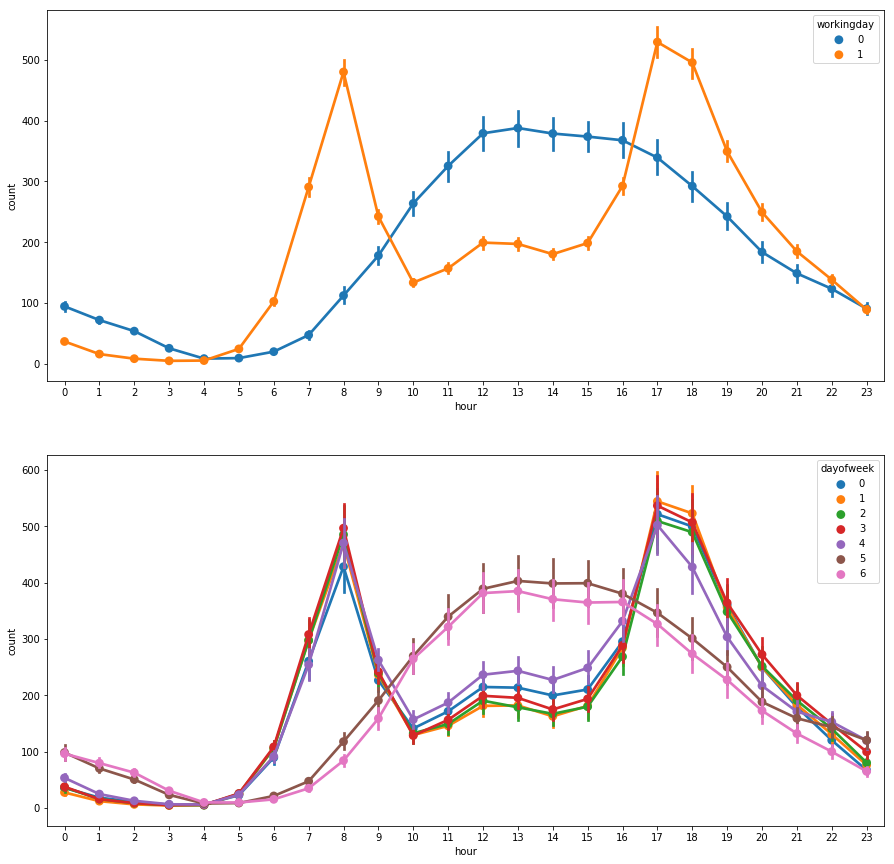

In [82]:
plt.figure(figsize=(15,15))  ##전체 그래프 크기 지정
plt.subplot(2,1,1)
sns.pointplot(data=new_tr, x="hour", y="count", hue="workingday")

plt.subplot(2,1,2)
sns.pointplot(data=new_tr, x="hour", y="count", hue="dayofweek")
plt.show()

**컬럼 선택**

In [83]:
## 컬럼은 8개의 컬럼을 쓰겠다.
feature_names = ['s_spring', 's_summer','s_fall', 's_winter',
                 'holiday', 'workingday', 
                 'weather_1', 'weather_2', 'weather_3', 'weather_4',
                 'temp', 'atemp', 'humidity', 'windspeed',
                 "year", 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'dayofweek_0',
                 'hour'
                 ]
feature_names

['s_spring',
 's_summer',
 's_fall',
 's_winter',
 'holiday',
 'workingday',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5',
 'dayofweek_6',
 'dayofweek_0',
 'hour']

In [0]:
X_train = new_tr[feature_names]
X_test = new_test[feature_names]
label_name = "count"
y_train =  new_tr[label_name]

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [0]:
import numpy as np
from sklearn.metrics import make_scorer

In [88]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    diff = log_predict - log_actual
    square_diff = diff ** 2
    mean_square_diff = square_diff.mean()
    
    score = np.sqrt(mean_square_diff)
    
    return score

print(rmsle([10, 20, 30], [10, 20, 30]))
print(rmsle([10, 20, 30], [20, 30, 40]))
print(rmsle([10, 20, 30], [10, 40, 90]))

rmsle_score = make_scorer(rmsle)
rmsle_score

0.0
0.46474982164238354
0.7319565927299515


make_scorer(rmsle)

**선형모델**


In [89]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
score = cross_val_score(model_linear, X_train, y_train, cv=5, scoring=rmsle_score)

print(score)
print("RMLSE 평균 :", score.mean())

[       nan        nan        nan 1.30165029 1.21933755]
RMLSE 평균 : nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


**의사 결정트리**

In [90]:
model_decisionTree = DecisionTreeRegressor()
model_decisionTree.fit(X_train, y_train)
score = cross_val_score(model_decisionTree, X_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("RMLSE 평균 :", score.mean())

[0.77944286 0.48838099 0.65127841 0.45167648 0.49908061]
RMLSE 평균 : 0.5739718698395955


**knn모델**


In [91]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
score = cross_val_score(model_knn, X_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("RMLSE 평균 :", score.mean())

[1.28377988 0.93213065 1.00231753 0.84908577 0.7993588 ]
RMLSE 평균 : 0.9733345229811855


**앙상블모델**


In [92]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("RMLSE 평균 :", score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.78896781 0.39200102 0.55192086 0.36548826 0.3726029 ]
RMLSE 평균 : 0.4941961713835544


**앙상블 모델(AdaBoostRegressor)**

In [93]:
model_Ada = AdaBoostRegressor()
model_Ada.fit(X_train, y_train)
score = cross_val_score(model_Ada, X_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("RMLSE 평균 :", score.mean())

[1.36720378 0.93234265 1.0797681  0.81920787 0.90685644]
RMLSE 평균 : 1.0210757697499222


In [0]:
import xgboost as xgb

In [0]:
# data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
# 기본 옵션 확인
xg_reg = xgb.XGBRegressor()

In [97]:
xg_reg = xgb.XGBRegressor(n_estimators = 500,
                          max_depth=10, 
                          learning_rate=0.01)  # n_estimators=100
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
xg_reg.fit(X_train,y_train)
score = cross_val_score(xg_reg, X_train, y_train, 
                        cv=5, scoring=rmsle_score)
print(score)
print("RMLSE 평균 :", score.mean())

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.7180953  0.36555156 0.4818437  0.34924452 0.34614256]
RMLSE 평균 : 0.45217552669365224
